In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

### SVR packge

In [2]:
import sklearn
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [4]:
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False

In [5]:
def notEmpty(s):
    return s !=''

### 读取数据

In [7]:
path = 'datas/boston_housing.data'
names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
#数据格式不一致，自行处理
fd = pd.read_csv(path,header=None)
data = np.empty((len(fd),14))
for i,d in enumerate(fd.values):
    d = map(float,filter(notEmpty, d[0].split(' ')))
    data[i] = list(d)

In [8]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [9]:
#分割数据
x,y = np.split(data,(13,),axis=1)
y =y.ravel()

In [10]:
x.shape

(506, 13)

In [11]:
y.shape

(506,)

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=28,train_size=0.8)


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### 构建参数 网格搜索

In [16]:
parameters = {
    'kernel':['linear','rbf'],
    'C':[0.1,0.5,0.9,1,5],
    'gamma':[0.001,0.01,0.1,1]
}

model = GridSearchCV(SVR(),param_grid = parameters,cv=3)
model.fit(x_train,y_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['linear', 'rbf'], 'C': [0.1, 0.5, 0.9, 1, 5], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [15]:
parameters = {
    'kernel':['linear','rbf'],
    'C':[0.1,0.5,0.9,1,5],
    'gamma':[0.001,0.01,0.1,1]
}

model = GridSearchCV(SVR(),param_grid=parameters, cv=3)
model.fit(x_train,y_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['linear', 'rbf'], 'C': [0.1, 0.5, 0.9, 1, 5], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### 查看最优参数

In [17]:
print('最优参数列表：',model.best_params_)
print('最优模型：',model.best_estimator_)
print('最优准确率：',model.best_score_)

最优参数列表： {'C': 5, 'gamma': 0.001, 'kernel': 'linear'}
最优模型： SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
最优准确率： 0.7372572871508232


In [18]:
print('训练集准确率：%.2f%%' % (model.score(x_train,y_train)*100))
print('测试集准确率：%.2f%%' % (model.score(x_test,y_test)*100))

训练集准确率：74.37%
测试集准确率：48.77%


### 可视化

C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


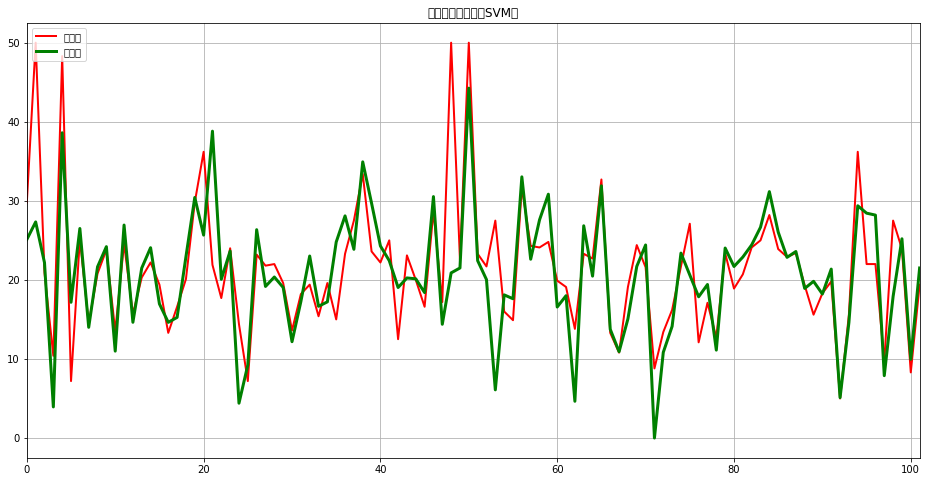

In [19]:
colors = ['g-','b-']
ln_x_test = range(len(x_test))
y_predict = model.predict(x_test)

plt.figure(figsize=(16,8),facecolor='w')
plt.plot(ln_x_test,y_test,'r-',lw=2,label=u'真实值')
plt.plot(ln_x_test,y_predict,'g-',lw=3,label=u'估计值')

#图形显示
plt.legend(loc='upper left')
plt.grid(True)
plt.title(u'波士顿房价预测（SVM）')
plt.xlim(0,101)
plt.show()